In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
from pathlib import Path

data_dir = Path("/kaggle/input/house-prices-advanced-regression-techniques")

train_df = pd.read_csv(data_dir / "train.csv", index_col="Id")
test_df = pd.read_csv(data_dir / "test.csv", index_col="Id")


In [3]:
#checking missing values for training part
print(train_df.isnull().sum(),"\n")

print("wait...")
#checking missing values for testing part
print(test_df.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64 

wait...
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64


In [4]:
df = pd.concat([train_df,test_df],axis=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
df.shape

(2919, 80)

In [6]:
df.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [7]:
df_c = df.copy()
obj_cols = df_c.select_dtypes(include='object').columns
num_cols = df_c.select_dtypes(exclude='object').columns
# print(obj_cols,"\n",num_cols)

In [8]:
obj_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
#filling in the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
for col in obj_cols:
    df[col] = imputer.fit_transform(df[[col]]).ravel()

print(df[obj_cols].isnull().sum())

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64


In [11]:
#filling in the missing values
for col in num_cols:
    df_c[col] = df_c[col].fillna(df_c[col].mean())

print(df_c[num_cols].isnull().sum())

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


In [12]:
#encoding for categorical columns
for col in obj_cols:
    df_c[col] = pd.factorize(df_c[col])[0]

discrete_features = df_c[obj_cols] == int 

In [13]:
# print(discrete_features)

In [14]:
df_c.isnull().sum()
df_c.shape
df_c.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,0,65.0,8450,0,-1,0,0,0,0,...,0,-1,-1,-1,0,2,2008,0,0,208500.0
2,20,0,80.0,9600,0,-1,0,0,0,1,...,0,-1,-1,-1,0,5,2007,0,0,181500.0
3,60,0,68.0,11250,0,-1,1,0,0,0,...,0,-1,-1,-1,0,9,2008,0,0,223500.0
4,70,0,60.0,9550,0,-1,1,0,0,2,...,0,-1,-1,-1,0,2,2006,0,1,140000.0
5,60,0,84.0,14260,0,-1,1,0,0,1,...,0,-1,-1,-1,0,12,2008,0,0,250000.0


In [15]:
X = df_c.drop('SalePrice',axis=1)
y = df_c['SalePrice']

from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
y_preds = lr.predict(X_valid)

from sklearn.metrics import r2_score
r2 = r2_score(y_valid,y_preds)
print(r2)

0.41590110109539624


In [18]:
#finding the MI score of the imp features
from sklearn.feature_selection import mutual_info_regression
mi_score = mutual_info_regression(X_train,y_train)
mi_df = pd.DataFrame({"Features":X_train.columns,"MI Score":mi_score}).sort_values(by='MI Score',ascending=False)

In [19]:
mi_df.head(20)

,Features,MI Score
16,OverallQual,0.300028
45,GrLivArea,0.243497
11,Neighborhood,0.207464
60,GarageCars,0.203590
37,TotalBsmtSF,0.193890
26,ExterQual,0.168782
61,GarageArea,0.167965
18,YearBuilt,0.166439
29,BsmtQual,0.149996
58,GarageYrBlt,0.146796


In [20]:
#column transformation for X_train 
X_train['GarageValue'] = X_train['GarageArea'] * X_train['GarageYrBlt']

X_train['TotalUsableArea'] = X_train['GrLivArea']+ X_train['TotalBsmtSF']

X_train['Year_remodeled'] = X_train['YearRemodAdd'] - X_train['YearBuilt']

#column transformations for X_valid
X_valid['GarageValue'] = X_valid['GarageArea'] * X_valid['GarageYrBlt']

X_valid['TotalUsableArea'] = X_valid['GrLivArea']+ X_valid['TotalBsmtSF']

X_valid['Year_remodeled'] = X_valid['YearRemodAdd'] - X_valid['YearBuilt']


In [21]:
mi_score = mutual_info_regression(X_train,y_train)
mi_df = pd.DataFrame({"Features":X_train.columns,"MI Score":mi_score}).sort_values(by='MI Score',ascending=False)
mi_df.head(20)

,Features,MI Score
80,TotalUsableArea,0.317184
16,OverallQual,0.286199
45,GrLivArea,0.230683
11,Neighborhood,0.215807
79,GarageValue,0.186113
29,BsmtQual,0.179315
37,TotalBsmtSF,0.178066
60,GarageCars,0.166737
61,GarageArea,0.164771
26,ExterQual,0.161722


In [22]:
X_train_another = X_train.drop(['GarageArea', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF', 'YearRemodAdd', 'YearBuilt'], axis=1)
X_valid_another = X_valid.drop(['GarageArea', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF', 'YearRemodAdd', 'YearBuilt'], axis=1)

In [23]:
mi_score = mutual_info_regression(X_train_another,y_train)

mi_df = pd.DataFrame({
    "Features": X_train_another.columns,
    "MI Score": mi_score
}).sort_values(by='MI Score', ascending=False)

mi_df.head(20)


,Features,MI Score
74,TotalUsableArea,0.316374
16,OverallQual,0.274607
11,Neighborhood,0.220178
73,GarageValue,0.186646
55,GarageCars,0.169224
27,BsmtQual,0.167717
24,ExterQual,0.144011
48,KitchenQual,0.141649
0,MSSubClass,0.140939
39,1stFlrSF,0.140654


In [24]:
X_top_features = mi_df.head(20)['Features'].tolist()
X_top_features

['TotalUsableArea',
 'OverallQual',
 'Neighborhood',
 'GarageValue',
 'GarageCars',
 'BsmtQual',
 'ExterQual',
 'KitchenQual',
 'MSSubClass',
 '1stFlrSF',
 'GarageFinish',
 'FullBath',
 '2ndFlrSF',
 'LotFrontage',
 'FireplaceQu',
 'Foundation',
 'TotRmsAbvGrd',
 'BsmtFinType1',
 'Fireplaces',
 'GarageType']

In [25]:
X_train_top20 = X_train_another[X_top_features]
X_valid_top20 = X_valid_another[X_top_features]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top20)
X_valid_scaled = scaler.transform(X_valid_top20)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20,random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(X_train_pca)
X_train_top20['Cluster'] = clusters

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_13/2819315399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_top20['Cluster'] = clusters


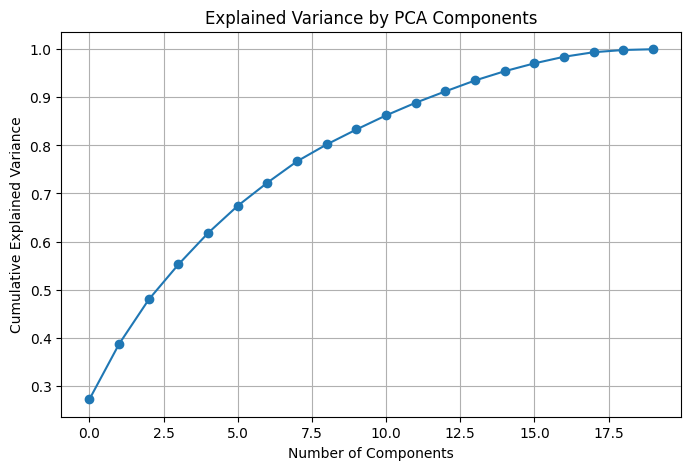

In [29]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.title('Explained Variance by PCA Components')
plt.show()


In [30]:
print(pca.explained_variance_ratio_)

[0.27218438 0.11493155 0.0924871  0.07290478 0.06538926 0.05656162
 0.04815542 0.04437195 0.03508341 0.03106307 0.02931295 0.02635321
 0.02361406 0.0226593  0.01923509 0.01635149 0.01369101 0.00943912
 0.00461071 0.00160053]


In [31]:
feature_names = X_train_top20.columns.drop('Cluster') if 'Cluster' in X_train_top20.columns else X_train_top20.columns

loadings = pd.DataFrame(
    pca.components_.T,
    index=feature_names,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
TotalUsableArea,0.365424,0.152004,0.012465,0.201321,-0.104797,0.109898,-0.076642,0.065221,0.152426,-0.157918,0.051222,-0.131628,0.047246,-0.013958,0.196441,-0.028082,0.050570,0.517809,-0.103966,-0.614872
OverallQual,0.344060,-0.076319,-0.014665,0.029620,0.095805,0.156274,-0.179150,-0.103289,-0.068595,-0.045410,-0.027302,0.060285,-0.026644,-0.104472,0.201627,0.821118,-0.105365,-0.218110,0.036360,0.026213
Neighborhood,-0.077449,0.070269,0.301511,-0.009652,0.279425,0.309603,-0.014409,0.719370,0.051156,0.272068,-0.276562,0.169931,-0.084487,-0.077641,0.090485,0.016097,0.014866,0.045020,0.023715,0.002068
GarageValue,0.332295,0.009322,-0.083753,-0.325732,-0.121974,0.072575,0.034641,-0.135272,0.168244,0.188389,-0.000382,0.413112,0.014488,-0.046409,0.072493,-0.170306,0.030550,0.083114,0.676613,0.002597
GarageCars,0.341450,-0.045896,-0.019446,-0.348336,-0.077174,0.057128,0.038761,-0.075200,0.108794,0.167012,0.018475,0.389231,-0.021724,-0.023230,0.003179,-0.153867,0.043996,-0.146675,-0.709567,-0.003043
BsmtQual,-0.035614,0.382937,0.103357,-0.025142,-0.149996,0.177653,-0.527155,-0.252346,-0.054660,-0.142356,-0.593585,0.020950,0.059024,-0.011887,-0.215079,-0.094017,0.077507,-0.049359,-0.016842,0.040740
ExterQual,-0.164896,0.408883,0.150467,0.013486,-0.055442,0.231423,0.184735,-0.154164,-0.033230,0.133176,0.172856,0.149988,-0.024089,0.744301,0.116580,0.166291,0.001479,0.030542,-0.017818,0.001589
KitchenQual,-0.099722,0.414090,0.169472,0.020671,-0.053879,0.327575,0.121585,-0.210486,-0.218671,0.187601,0.384453,-0.073436,-0.223967,-0.573574,-0.045297,-0.033864,0.031274,-0.022863,-0.008570,-0.003433
MSSubClass,-0.025173,-0.280227,0.414539,0.090518,0.157952,0.334700,0.023992,-0.245213,0.275531,0.071523,0.106990,-0.082528,0.645975,-0.038366,-0.128360,-0.056238,-0.034732,-0.063550,0.008008,-0.011444
1stFlrSF,0.285747,0.272066,-0.250288,0.105790,0.031433,0.217270,0.100727,0.140685,0.349195,-0.239540,0.065347,-0.213123,0.074693,-0.011923,0.065738,-0.073733,-0.010343,0.133904,-0.055285,0.653284


In [32]:
X_valid_clusters = kmeans.predict(X_valid_pca)
X_valid_top20['Cluster'] = X_valid_clusters


/tmp/ipykernel_13/20390676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_top20['Cluster'] = X_valid_clusters


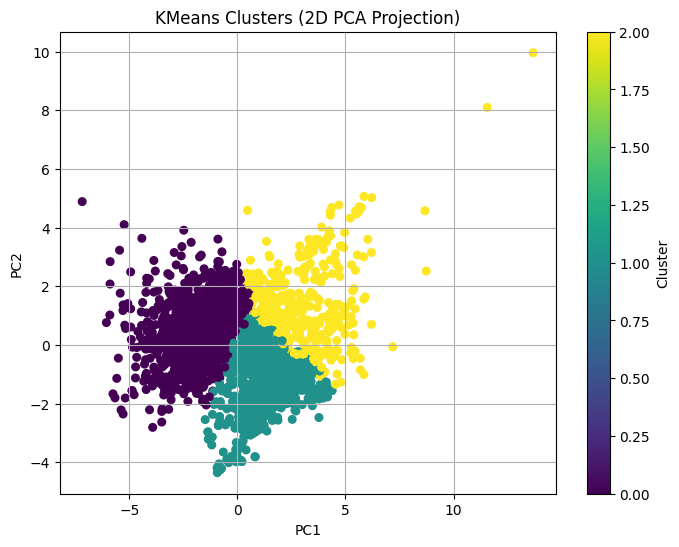

In [33]:
import matplotlib.pyplot as plt

pca_2d = PCA(n_components=2, random_state=42)
X_train_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=clusters, cmap='viridis', s=30)
plt.title("KMeans Clusters (2D PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


In [34]:
X_train_final = X_train_pca
X_valid_final = X_valid_pca

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_final,y_train)

LinearRegression()

In [36]:
from sklearn.metrics import mean_squared_error
ypreds = lr.predict(X_valid_final)
r2 = r2_score(y_valid,ypreds)
r2
mse = mean_squared_error(y_valid, y_preds)
rmse = mean_squared_error(y_valid, y_preds, squared=False)
r2 = r2_score(y_valid, y_preds)

print(f"RMSE: {rmse:.2f}")
print(r2)

RMSE: 45643.31
0.41590110109539624


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_final, y_train)

y_pred_rf = rf.predict(X_valid_final)

print("Random Forest RMSE:", mean_squared_error(y_valid, y_pred_rf, squared=False))


Random Forest RMSE: 47306.2417537721


In [38]:
#rectifying the issues i.e., improving the model's performance
#1st step
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca,y_train)
y_preds = lr_pca.predict(X_valid_pca)
print("r2 score after PCA:",r2_score(y_valid,y_preds))

r2 score after PCA: 0.40531415438440166


In [39]:
from sklearn.linear_model import SGDRegressor
sgd_pca = SGDRegressor()
sgd_pca.fit(X_train_pca,y_train)
y_preds = sgd_pca.predict(X_valid_pca)
print("r2 score after PCA:",r2_score(y_valid,y_preds))

r2 score after PCA: 0.40416074725304485


In [40]:
print(pca.explained_variance_ratio_.cumsum())


[0.27218438 0.38711593 0.47960303 0.55250781 0.61789707 0.67445869
 0.7226141  0.76698606 0.80206947 0.83313254 0.86244549 0.88879869
 0.91241275 0.93507206 0.95430715 0.97065864 0.98434964 0.99378876
 0.99839947 1.        ]


In [41]:
sgd_pca = SGDRegressor(
    max_iter=10000000,         # number of epochs
    learning_rate='constant',  # fixed learning rate
    eta0=0.0001,             # learning rate value
    penalty='l2',          # regularization
    alpha=0.0001,          # regularization strength
    random_state=42
)

sgd_pca.fit(X_train_pca, y_train)
y_preds = sgd_pca.predict(X_valid_pca)

from sklearn.metrics import r2_score
print("R2 score after tuning SGD:", r2_score(y_valid, y_preds))


R2 score after tuning SGD: 0.4043812743563878


In [42]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [43]:
X_train_top20

,TotalUsableArea,OverallQual,Neighborhood,GarageValue,GarageCars,BsmtQual,ExterQual,KitchenQual,MSSubClass,1stFlrSF,...,FullBath,2ndFlrSF,LotFrontage,FireplaceQu,Foundation,TotRmsAbvGrd,BsmtFinType1,Fireplaces,GarageType,Cluster
Id,,,,,,,,,,,,,,,,,,,,,
2651,2311.0,6,20,908960.0,2.0,0,1,1,160,855,...,2,601,24.0,0,1,6,1,1,0,1
1710,2820.0,8,5,1388152.0,2.0,0,0,0,20,1448,...,2,0,75.0,1,0,6,0,1,0,1
870,2999.0,7,12,1143982.0,2.0,0,0,0,60,1062,...,2,887,80.0,0,0,8,0,1,0,1
2356,2188.0,5,12,1154304.0,2.0,0,0,0,20,1094,...,1,0,60.0,-1,0,6,0,0,1,1
2915,1638.0,4,14,0.0,0.0,1,1,1,160,546,...,1,546,21.0,-1,1,5,2,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,3098.0,6,6,957352.0,2.0,1,1,1,20,1671,...,2,0,80.0,0,0,7,5,1,0,2
1096,2628.0,6,0,882640.0,2.0,0,0,0,20,1314,...,2,0,78.0,1,0,6,0,1,0,1
1131,3103.0,4,23,1141056.0,2.0,1,1,0,50,1328,...,2,653,65.0,0,2,7,4,2,1,0


In [44]:
lr.fit(X_train_top20,y_train)
ypreds = lr.predict(X_valid_top20)
r2 = r2_score(y_valid,ypreds)
r2


0.40379628943502055

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

degree = 2

model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

model.fit(X_train_top20, y_train)
y_preds = model.predict(X_valid_top20)

print(f"R² with Polynomial Regression (degree={degree}):", r2_score(y_valid, y_preds))



R² with Polynomial Regression (degree=2): 0.3395968138030425
